# Deep Learning with PyTorch – Concrete Strength Prediction

This assignment focuses on applying neural networks to a real-world construction-related problem. You will use the **Concrete Strength Prediction** dataset, which contains information about various components that affect the compressive strength of concrete.

## Task Objective:
Build a deep learning model to predict concrete strength based on its material composition and other relevant features.

## You are expected to:
1. Perform exploratory data analysis (EDA), including statistical summaries and visualizations.
2. Prepare the dataset for training (normalization, handling of categorical variables, etc.).
3. Design and train a neural network model using PyTorch.
4. Evaluate model performance using appropriate regression metrics.
5. Analyze results and identify key features that influence concrete strength.

---

## Step-by-Step Instructions:

### 1. Import Libraries
- Import all necessary Python libraries for data processing, visualization, and building neural networks.

### 2. Data Preparation
- Download the **Concrete Strength Prediction** dataset (e.g., from Kaggle).
- Split the data into features (X) and the target variable (y).
- Divide data into training and test sets.
- Normalize features using `StandardScaler`.

### 3. Model Definition
- Create a custom neural network class by inheriting from `torch.nn.Module`.
- Define network architecture: input layer, hidden layers, and output layer.

### 4. Training Configuration
- Choose an appropriate loss function (e.g., `MSELoss`) and justify the choice.
- Select an optimizer (e.g., `SGD`).
- Define hyperparameters: learning rate, batch size, number of epochs.

### 5. Train the Model
- Implement a training loop with mini-batches.
- In each epoch:
  - Make predictions.
  - Calculate loss and update weights.
  - Print training progress.

### 6. Evaluate the Model
- Use the test set to evaluate model predictions.
- Calculate and report regression metrics such as MSE, MAE, and R². Justify the metric(s) chosen.

### 7. Analyze Results
- Plot predicted vs. actual values.
- Visualize loss over training epochs.

### 8. Model Optimization (optional)
- Try alternative network architectures.
- Tune hyperparameters for better results.

### 9. Conclusion
- Summarize the key findings and performance of your model on unseen data.


In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/ConcreteStrengthData.csv'

df = pd.read_csv(file_path, encoding='utf-8')
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   CementComponent   BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
0             540.0               0.0              0.0           162.0   
1             540.0               0.0              0.0           162.0   
2             332.5             142.5              0.0           228.0   
3             332.5             142.5              0.0           228.0   
4             198.6             132.4              0.0           192.0   

   SuperplasticizerComponent  CoarseAggregateComponent  \
0                        2.5                    1040.0   
1                        2.5                    1055.0   
2                        0.0                     932.0   
3                        0.0                     932.0   
4                        0.0                     978.4   

   FineAggregateComponent  AgeInDays  Strength  
0                   676.0   

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Розділяємо ознаки (X) та цільову змінну (y)
X = df.iloc[:, :-1]  # Усі колонки, окрім останньої
y = df.iloc[:, -1]   # Остання колонка — міцність бетону

# 2. Розділяємо дані на навчальний (80%) і тестовий (20%) набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Нормалізуємо ознаки
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Форма X_train:", X_train.shape)
print("Форма X_test:", X_test.shape)


Форма X_train: (824, 8)
Форма X_test: (206, 8)


In [ ]:
import torch
import torch.nn as nn

# Створюємо клас нейромережі
class ConcreteStrengthNN(nn.Module):
    def __init__(self):
        super(ConcreteStrengthNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 64),  # Вхідний шар (8 -> 64 нейронів)
            nn.ReLU(),
            nn.Linear(64, 32),  # Прихований шар (64 -> 32 нейрони)
            nn.ReLU(),
            nn.Linear(32, 1)  # Вихідний шар (32 -> 1 нейрон)
        )

    def forward(self, x):
        return self.model(x)

# Створюємо екземпляр моделі
model = ConcreteStrengthNN()
print(model)


ConcreteStrengthNN(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)


In [ ]:
import torch.optim as optim

# Функція втрат
criterion = nn.MSELoss()

# Оптимізатор
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Гіперпараметри
learning_rate = 0.01
batch_size = 32
num_epochs = 100

print("Налаштування завершено. Готові до навчання!")


Налаштування завершено. Готові до навчання!


In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Перетворюємо дані у тензори
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

# Створюємо DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Цикл навчання
for epoch in range(num_epochs):
    total_loss = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()  # Обнуляємо градієнти
        y_pred = model(X_batch)  # Прогноз
        loss = criterion(y_pred, y_batch)  # Обчислення втрат
        loss.backward()  # Зворотне поширення
        optimizer.step()  # Оновлення вагів

        total_loss += loss.item()

    # Виводимо прогрес навчання кожні 10 епох
    if (epoch + 1) % 10 == 0:
        print(f"Епоха {epoch+1}/{num_epochs}, Втрата: {total_loss / len(train_loader):.4f}")

print("Навчання завершено!")


Епоха 10/100, Втрата: 5.9169
Епоха 20/100, Втрата: 7.0572
Епоха 30/100, Втрата: 6.8344
Епоха 40/100, Втрата: 7.3084
Епоха 50/100, Втрата: 6.1175
Епоха 60/100, Втрата: 9.2474
Епоха 70/100, Втрата: 5.9711
Епоха 80/100, Втрата: 5.4589
Епоха 90/100, Втрата: 5.8815
Епоха 100/100, Втрата: 6.4250
Навчання завершено!


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Перетворюємо тестові дані у тензори
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Прогнозуємо на тестовому наборі
model.eval()  # Переводимо модель у режим оцінки
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)

# Перетворюємо назад у NumPy
y_pred = y_pred_tensor.numpy()
y_test = y_test_tensor.numpy()

# Обчислюємо метрики
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Виводимо результати
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")


MSE: 35.3428
MAE: 3.7553
R²: 0.8628


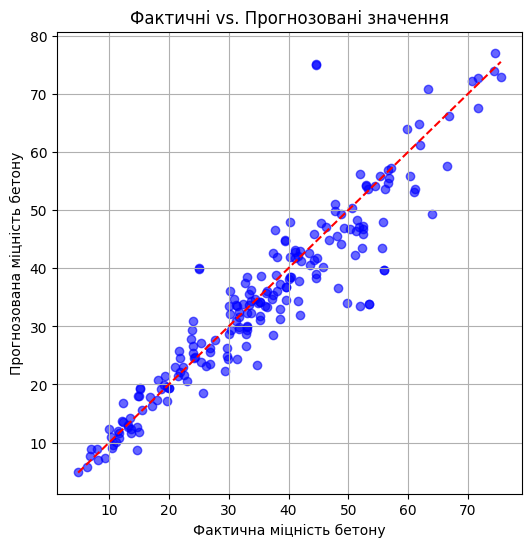

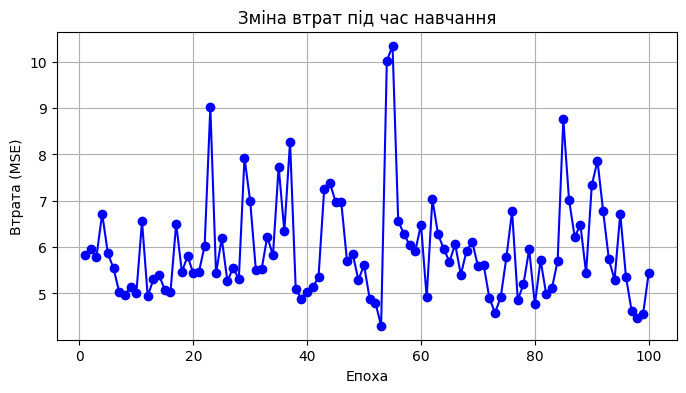

In [ ]:
import matplotlib.pyplot as plt

# Графік: Фактичні vs. Прогнозовані значення

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Лінія ідеального прогнозу
plt.xlabel("Фактична міцність бетону")
plt.ylabel("Прогнозована міцність бетону")
plt.title("Фактичні vs. Прогнозовані значення")
plt.grid()
plt.show()

# Графік зміни втрат під час навчання
losses = []  # Список для збереження втрат

# Перезапускаємо навчання для збору даних про втрати
for epoch in range(num_epochs):
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    losses.append(total_loss / len(train_loader))

# Графік втрат
plt.figure(figsize=(8, 4))
plt.plot(range(1, num_epochs + 1), losses, marker='o', linestyle='-', color='b')
plt.xlabel("Епоха")
plt.ylabel("Втрата (MSE)")
plt.title("Зміна втрат під час навчання")
plt.grid()
plt.show()


# Висновки щодо навчання моделі

1. Оцінка точності моделі

  MSE = 35.3428 → середня квадратична помилка.

  MAE = 3.7553 → в середньому модель помиляється на ≈3.7 одиниці міцності бетону, що є непоганим результатом.

  R² = 0.8628 → модель пояснює ≈ 86.2% варіації в даних, що вказує на хорошу відповідність.

2. Вплив збільшення кількості епох
  Навіть після 200 епох втрата (MSE) не покращилась, що може вказувати на плато в навчанні або перенавчання.
Можливо, оптимізація градієнта вийшла на стабільний рівень, і подальше навчання не приносить користі.

# Загальний висновок

Модель має хорошу якість прогнозування (R² ≈ 0.86).

Подальше збільшення епох не покращує результати.
Для досягнення ще кращих результатів можна протестувати інші методи нейромережевого навчання або алгоритми машинного навчання (наприклад, градієнтний бустинг).
